# Course 02 - Introduction to Linear Regression

In this notebook, we will learn how to use:
* numpy - a python library helping to perform math operators on matrices and tensors efficiently
* solving Linear Regression using Exact Solution

# 1. Numpy

## The np.array class

In [ ]:
import numpy as np                 # import numpy library with the name as np

an_array = np.array([3, 33, 333])  # create a 1D array

print(type(an_array))              # print type of the object

<class 'numpy.ndarray'>


In [ ]:
print(an_array.shape)              # print array size

(3,)


In [ ]:
print(an_array[0], an_array[1], an_array[2])    # print array's elements manually

3 33 333


In [ ]:
an_array[0] = 888            # we can change the element's value by assigning it a particular number

print(an_array)

[888  33 333]


In [ ]:
another = np.array([[11,12,13],
                    [21,22,23]])   # create a 2D array (a matrix)

print(another)  # print this matrix

print("Size of this matrix:", another.shape)  # rows x columns

print("Print the elements at indices [0,0], [0,1], and [1,0] of this matrix:", another[0, 0], ",",another[0, 1],",", another[1, 0])

[[11 12 13]
 [21 22 23]]
Size of this matrix: (2, 3)
Print the elements at indices [0,0], [0,1], and [1,0] of this matrix: 11 , 12 , 21


## Common operators

In [ ]:
x = np.array([[1,2],[3,4]], dtype=np.int64)                  ## create a matrix with integer elements
y = np.array([[4.1,5.1],[6.1,7.1]], dtype=np.float64)      ## create a matrix with float elements

print(x)
print()
print(y)

[[1 2]
 [3 4]]

[[4.1 5.1]
 [6.1 7.1]]


In [ ]:
# addition operator
print(x + y)

[[ 5.1  7.1]
 [ 9.1 11.1]]


In [ ]:
# subtraction operator
print(x - y)

[[-3.1 -3.1]
 [-3.1 -3.1]]


In [ ]:
# element-wise production
print(x * y)

[[ 4.1 10.2]
 [18.3 28.4]]


In [ ]:
# element-wise division
print(x / y)

[[0.24390244 0.39215686]
 [0.49180328 0.56338028]]


In [ ]:
# matrix production
print(np.matmul(x, y))
print(np.dot(x, y))

[[16.3 19.3]
 [36.7 43.7]]
[[16.3 19.3]
 [36.7 43.7]]


In [ ]:
# scalar product with a real number
print(0.01*x)

[[0.01 0.02]
 [0.03 0.04]]


In [ ]:
# inverse matrix
print(np.linalg.inv(x))

[[-2.   1. ]
 [ 1.5 -0.5]]


In [ ]:
# non-invertible matrix (singular matrix)
i_m = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
try:
  print("This matrix is invertible")
  print(np.linalg.inv(i_m))
except:
  print("This matrix is singular")
  print("The pseudo-inverse of this matrix is:")
  print(np.linalg.pinv(i_m))

This matrix is invertible
This matrix is singular
The pseudo-inverse of this matrix is:
[[-6.38888889e-01 -1.66666667e-01  3.05555556e-01]
 [-5.55555556e-02  4.20756436e-17  5.55555556e-02]
 [ 5.27777778e-01  1.66666667e-01 -1.94444444e-01]]


In [ ]:
# matrix transpose
print("Matrix x:")
print(x)

print("Transpose of x:")
print(x.T)
print(np.transpose(x))

Matrix x:
[[1 2]
 [3 4]]
Transpose of x:
[[1 3]
 [2 4]]
[[1 3]
 [2 4]]


## Other operators

In [ ]:
# reshape matrix: 2x2 to 4x1
print(x.reshape(4, 1))

[[1]
 [2]
 [3]
 [4]]


In [ ]:
# create a matrix having size 3x4 with all one-value elements
print(np.ones((3,4)))

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [ ]:
# concatenate two matrices by merging columns
np.concatenate([x,y], axis=1)

array([[1. , 2. , 4.1, 5.1],
       [3. , 4. , 6.1, 7.1]])

In [ ]:
# concatenate two matrices by merging rows
np.concatenate([x,y], axis=0)

array([[1. , 2. ],
       [3. , 4. ],
       [4.1, 5.1],
       [6.1, 7.1]])

# 2. Linear Regression

## Example

In [14]:
import os
module_path = os.path.abspath(os.path.join('..'))
print(module_path)

d:\Job\VinUni\Research Assistant\Teaching Assistant\2024 April\Machine learning\Code


In [12]:
import pandas as pd
df = pd.read_csv(os.path.join(module_path, "dataset", "House_Price.csv")) # load file csv

In [13]:
df #investigate the dataframe

,Size in feet squared,Price in thousand dollar
0,2497,729
1,1627,617
2,576,290
3,2156,728
4,1154,453
...,...,...
95,579,207
96,1551,368
97,2243,514
98,803,372


Text(0, 0.5, 'Price in thousand dollar')

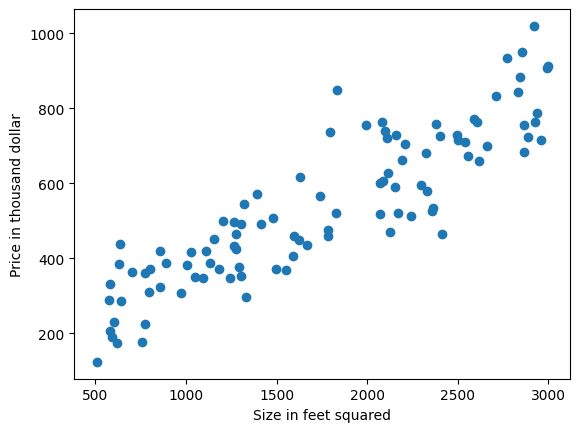

In [15]:
## plot the dataframe
import matplotlib.pyplot as plt
plt.scatter(df["Size in feet squared"], df["Price in thousand dollar"])
plt.xlabel("Size in feet squared")
plt.ylabel("Price in thousand dollar")

Now we want to solve a problem based on the size of the house, estimating the price:

- $X$ = house size

- $y$ = price

Let $\hat{y} = w_1X + w_2$ be the prediction, where $a$ and $b$ are real-number parameters.

We find $w_1$ and $w_2$ such that the mean squared error is minimized, i.e., finding $w_1$ and $w_2$ such that

$$ \sum (y_i-\hat{y}_i)^2 = \sum (y_i - w_1x_i + w_2)^2 $$

reaches its minimum value.

In this problem, $x_i$ is the size of the $i$-th house, $y_i$ are the price of this house.

Let $\mathbf{w} = (w_1, w_2)$, and $\mathbf{X}$, $\mathbf{y}$ are matrices where each row of $\mathbf{X}$ is the size of a house, corresponding rows of $\mathbf{y}$ are the prices of those houses.

Let $\mathbf{Z}$ be the extended matrix of $\mathbf{X}$ with an additional column of all ones. The objective function can be re-written as

$$\mathcal{L}\left(\mathbf{w}\right) = \frac{1}{2N}\left\lVert \mathbf{y}-\overline{\mathbf{Z}}\mathbf{w}\right\rVert^2_2.$$

We find the optimal parameter by solving the equation

$$\frac{1}{2N}\overline{\mathbf{Z}}^\top\left(\overline{\mathbf{Z}}\mathbf{w}-\mathbf{y}\right)=\frac{\partial \mathcal{L}\left(\mathbf{w}\right)}{\partial \mathbf{w}} = 0,$$

or

$$\overline{\mathbf{Z}}^\top\overline{\mathbf{Z}}\mathbf{w} = \overline{\mathbf{Z}}^\top\mathbf{y}.$$

By assigning $\mathbf{A}=\overline{\mathbf{Z}}^\top\overline{\mathbf{Z}}$, and $\mathbf{b} = \overline{\mathbf{Z}}^\top\mathbf{y}$, we will try to solve

$$\mathbf{A}\mathbf{w} = \mathbf{b}.$$

The solution is:

$$\mathbf{w} = \mathbf{A}^\dagger\mathbf{b} = \left(\overline{\mathbf{Z}}^\top\overline{\mathbf{Z}}\right)^\dagger\overline{\mathbf{Z}}^\top\mathbf{y},$$

where $\mathbf{M}^\dagger$ is a pseudo-inverse matrix of $\mathbf{M}$. Specifically, the problem is programmed as follows:

In [18]:
X = df['Size in feet squared'].values    # convert the house's area into a numpy array
X = X.reshape(-1, 1)                     # convert it into a column matrix
print(X[:5])

[[2497]
 [1627]
 [ 576]
 [2156]
 [1154]]


In [20]:
y = df['Price in thousand dollar'].values   # convert the house's price into a numpy array
y = y.reshape(-1,1)
print(y[:5])

[[729]
 [617]
 [290]
 [728]
 [453]]


In [23]:
import numpy as np

Z = np.concatenate([X, np.ones((100,1))], axis=-1)   # add one column after X, then assign this new X into Z
Z = Z.astype(np.float64)                                 # convert it into float-number array
print(Z[:5])

[[2.497e+03 1.000e+00]
 [1.627e+03 1.000e+00]
 [5.760e+02 1.000e+00]
 [2.156e+03 1.000e+00]
 [1.154e+03 1.000e+00]]


In [26]:
# find a, b
np.matmul(np.matmul(np.linalg.pinv(np.matmul(Z.T,Z)), Z.T), y)

array([[  0.23481102],
       [128.4945004 ]])

Text(0, 0.5, 'Price in thousand dollar')

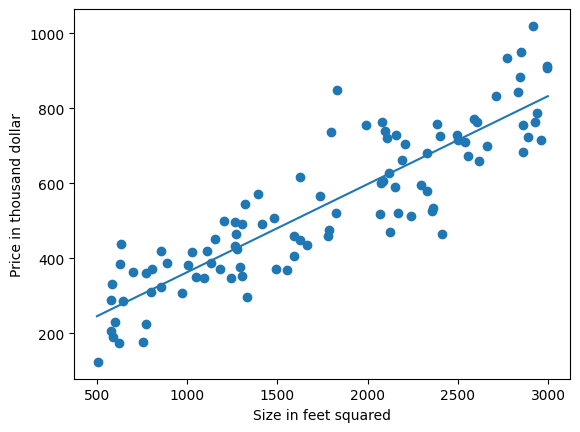

In [27]:
# plot the regression line
import matplotlib.pyplot as plt
plt.scatter(df["Size in feet squared"], df["Price in thousand dollar"])
plt.plot(np.arange(500, 3000), 0.23481099*np.arange(500, 3000) + 128.49492905)   # plot the regression line
plt.xlabel("Size in feet squared")
plt.ylabel("Price in thousand dollar")

In [28]:
#using sklearn library

from sklearn import datasets, linear_model

# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(Z, y)

LinearRegression(fit_intercept=False)

In [29]:
print('Solution found by scikit-learn:', regr.coef_)
print('Solution found manually:', np.matmul(np.matmul(np.linalg.pinv(np.matmul(Z.T,Z)), Z.T), y))

Solution found by scikit-learn: [[  0.23481102 128.4945004 ]]
Solution found manually: [[  0.23481102]
 [128.4945004 ]]


## 3. Exercise

Given a dataset consisting of 100 rows, including width, length, and price of a house (**House_Price_2**). We will build a model to predict house prices based on width and length.

Using the trained model, predict the prices of houses with the following information:

- width = 5, length = 10
- width = 20, length = 20
- width = 10, length = 40